In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
class climber:
    def __init__(self, reach, sloper, crimp, jug, position = [5,0], icon):
        
        self.reach = reach
        ##Strength (Percent Chance of Sticking a Move To) on Different Types of Holds/Rock
        self.sloper = sloper
        self.crimp = crimp
        self.jug = jug
        ##Location on the wall
        self.position = position
        ##Icon for visualization
        self.icon = icon
        
    def make_move(self):
        

In [44]:
class cell:
    def __init__(self, slopers, crimps, jugs):
        ##Number of Each Type of Hold/Rock
        self.slopers = slopers
        self.crimps = crimps
        self.jugs = jugs
        self.num_cells = 1
        
        ##Setting Coordinates of the Holds
        self.total_holds = self.slopers + self.crimps + self.jugs
        self.x = np.random.randint(1, 10, size = self.total_holds)
        self.y = np.random.randint(1, 10, size = self.total_holds)
        self.holds = np.concatenate((np.repeat('slopers', slopers), np.repeat('crimps', crimps), np.repeat('jugs', jugs)))
        
        self.hold_cords = []
        for i in range(self.total_holds):
            self.hold_cords.append([self.x[i], self.y[i]])
        
    def show(self):
        sns.scatterplot(x = self.x,y = self.y, hue = self.holds, style = self.holds, palette = 'bright', s = 100)
        plt.axis([0,10, 0, 10])
        plt.show()

In [45]:
class wall:
    def __init__(self, smallwall, cell):
        ##Number of Each Type of Hold/Rock
        self.slopers = smallwall.slopers + cell.slopers
        self.crimps = smallwall.crimps + cell.crimps
        self.jugs = smallwall.jugs + cell.jugs
        self.num_cells = smallwall.num_cells + cell.num_cells
        
        ##Setting Coordinates of the Holds
        self.total_holds = self.slopers + self.crimps + self.jugs
        self.x = np.concatenate((smallwall.x, cell.x))
        self.y = np.concatenate((smallwall.y, cell.y + np.repeat(10*(self.num_cells-1), len(cell.y))))
        self.holds = np.concatenate((smallwall.holds, cell.holds))
        
        self.hold_cords = []
        for i in range(self.total_holds):
            self.hold_cords.append([self.x[i], self.y[i]])
        
    def show(self, show_scale = 1, title = 'Rock Wall'):
        fig = plt.figure(figsize = (10*show_scale, len(self.x)*show_scale))
        sns.scatterplot(x = self.x,y = self.y, hue = self.holds, style = self.holds, palette = 'bright', s = 100)
        plt.axis([0,10, 0, 10*self.num_cells])
        plt.title(title)
        plt.show()

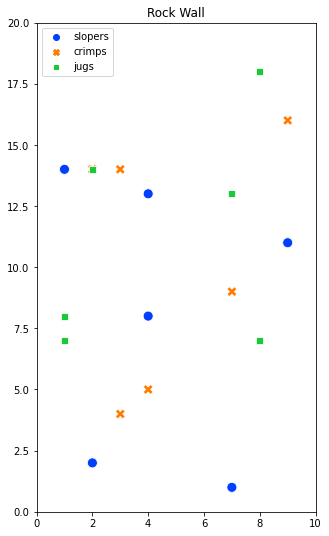

In [46]:
cell1 = cell(3,3,3)
cell2 = cell(3,3,3)

wall = wall(cell1, cell2)
wall.show(1/2)
wall.hold_cords
plt.legend?

In [25]:
##Notes
##We decided two holds being placed in the same location is appropriate given that many climbing gyms will drill one hold on 
##top of another to make the move easier/more attainable for different climbing types